<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/CNN/05_workshop_convolucionales_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
import numpy as np

import matplotlib.pyplot as plt

from keras.utils import (
    image_dataset_from_directory
)

# **Config**
---

In [20]:
random_seed = 12354

# **Data**
---

- download the ZIP file of the raw data

In [2]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   178M      0  0:00:04  0:00:04 --:--:--  180M


In [3]:
!unzip -q kagglecatsanddogs_5340.zip
!ls

 CDLA-Permissive-2.0.pdf   kagglecatsanddogs_5340.zip   PetImages  'readme[1].txt'   sample_data


**Filter Out Corrupted Images**

In [18]:
def filter_corrupt_img():
  num_skipped = 0
  for folder in ('Cat', 'Dog'):
    folder_path = os.path.join('PetImages', folder)
    for fname in os.listdir(folder_path):
      fpath = os.path.join(folder_path, fname)
      try:
        obj = open(fpath, 'rb')
        is_jfif = b"JFIF" in obj.peek(10)
      finally:
        obj.close()
      if not is_jfif:
        num_skipped += 1
        os.remove(fpath)
  return num_skipped

print(f"Deleted {filter_corrupt_img()} images.")

Deleted 1590 images.


**Generate a Dataset**


In [25]:
image_size = (180, 180)
batch_size = 128

X_train, X_test = image_dataset_from_directory(
    'PetImages',
    validation_split=0.2,
    subset='both',
    seed=random_seed,
    image_size = image_size,
    batch_size = batch_size
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.


**Visualization the data**

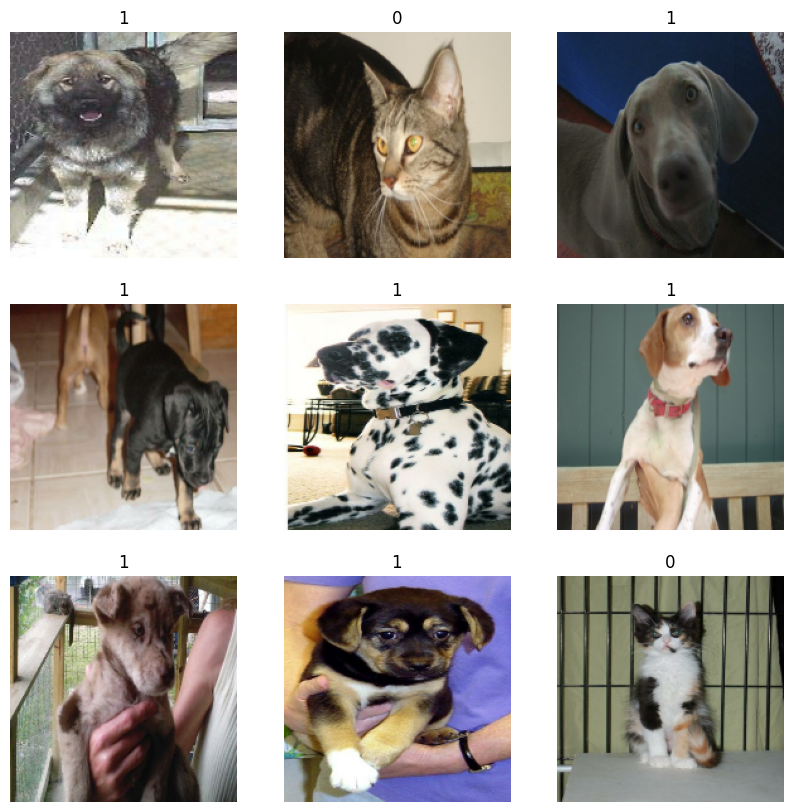

In [37]:
plt.figure(figsize=(10, 10))
for image, labels in X_train.take(8):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(image[i]).astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")